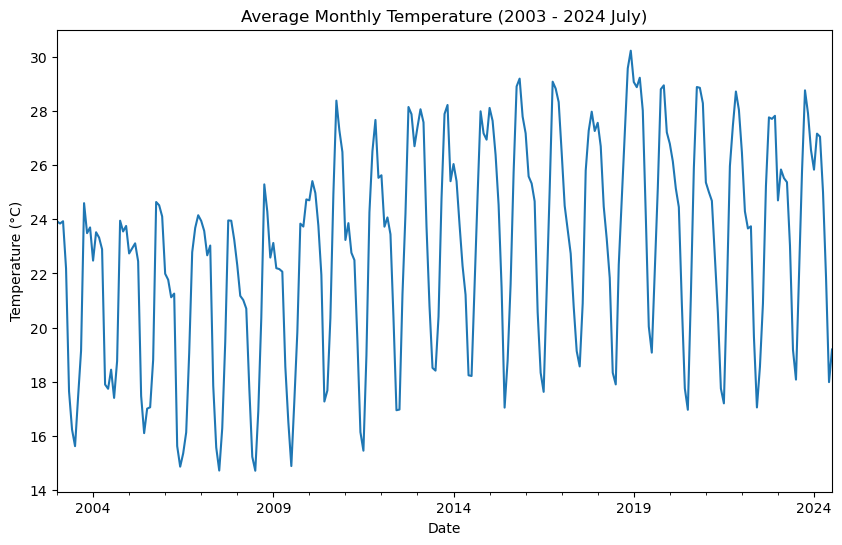

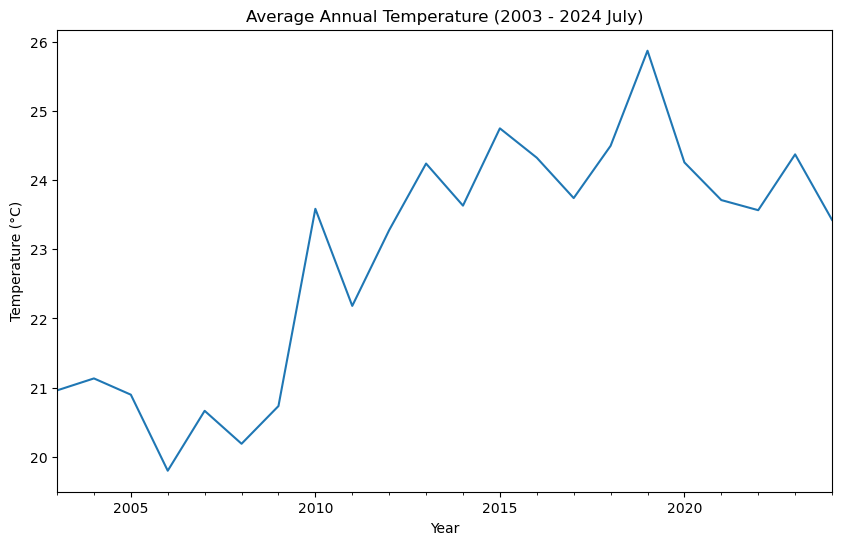

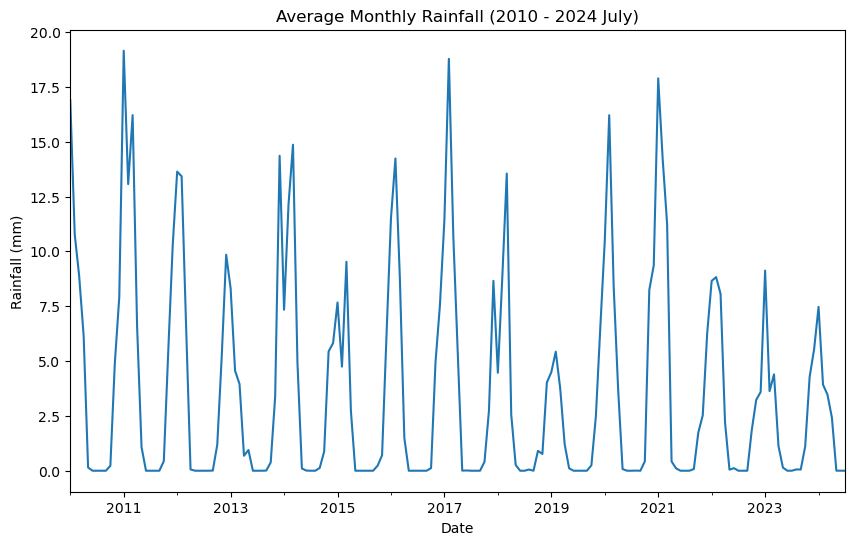

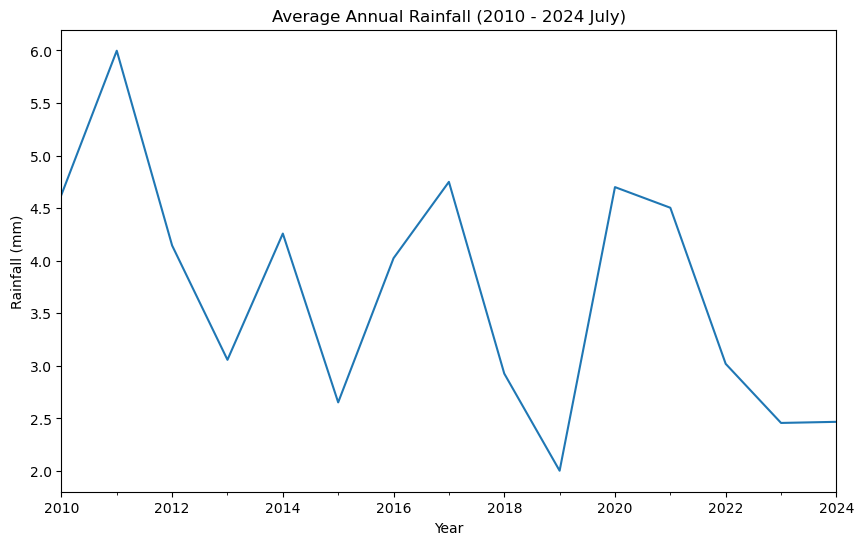

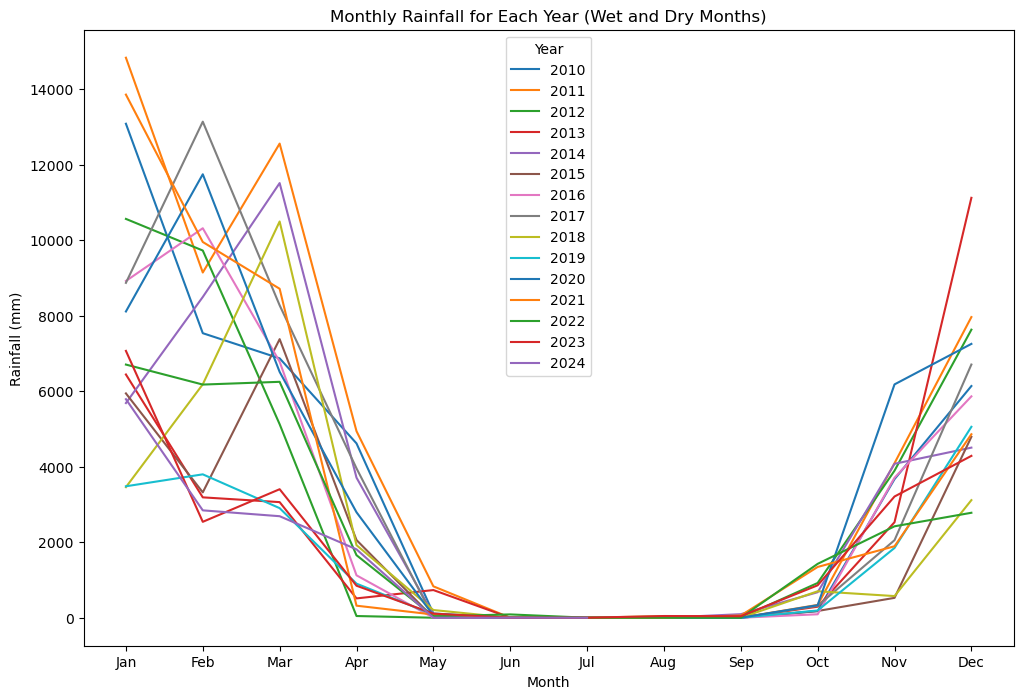

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('df1 (1).csv', low_memory=False)

# Create a datetime index from 'year' and 'month' columns
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('datetime', inplace=True)

# Filter data for temperature (2003 - 2024 July) and precipitation (2010 - 2024 July)
temperature_data = df['2003-01-01':'2024-07-31']
precipitation_data = df['2010-01-01':'2024-07-31']

# Task 1: Plot Average Monthly Temperature
monthly_avg_temp = temperature_data['tempavg'].resample('M').mean()
plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(title='Average Monthly Temperature (2003 - 2024 July)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

# Task 2: Plot Average Annual Temperature
annual_avg_temp = temperature_data['tempavg'].resample('Y').mean()
plt.figure(figsize=(10, 6))
annual_avg_temp.plot(title='Average Annual Temperature (2003 - 2024 July)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.show()

# Task 3: Plot Average Monthly Rainfall
monthly_avg_rainfall = precipitation_data['precip'].resample('M').mean()
plt.figure(figsize=(10, 6))
monthly_avg_rainfall.plot(title='Average Monthly Rainfall (2010 - 2024 July)')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.show()

# Task 4: Plot Average Annual Rainfall
annual_avg_rainfall = precipitation_data['precip'].resample('Y').mean()
plt.figure(figsize=(10, 6))
annual_avg_rainfall.plot(title='Average Annual Rainfall (2010 - 2024 July)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()

# Task 5: Plot Rainfall Received Each Month for Each Year (Wet and Dry Months)
monthly_rainfall = precipitation_data['precip'].resample('M').sum()
monthly_rainfall_df = monthly_rainfall.to_frame(name='monthly_rainfall')
monthly_rainfall_df['Year'] = monthly_rainfall_df.index.year
monthly_rainfall_df['Month'] = monthly_rainfall_df.index.month

plt.figure(figsize=(12, 8))
for year in monthly_rainfall_df['Year'].unique():
    yearly_data = monthly_rainfall_df[monthly_rainfall_df['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['monthly_rainfall'], label=year)

plt.title('Monthly Rainfall for Each Year (Wet and Dry Months)')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.legend(title='Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


     -------------------------------------- 124.9/124.9 MB 3.5 MB/s eta 0:00:00


C:\Users\26485\AppData\Local\Temp\ipykernel_21572\2497162845.py:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


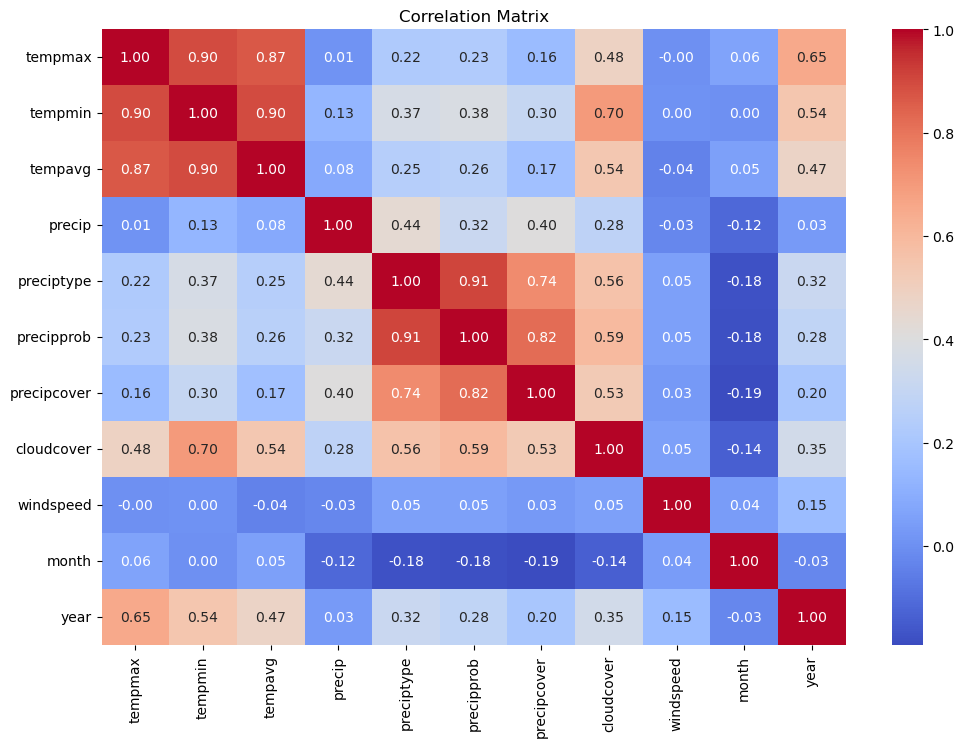

Evaluating Models for Temperature Prediction...
Gradient Boosting - MAE: 0.697, RMSE: 0.952, R2: 0.941
Random Forest - MAE: 0.735, RMSE: 1.094, R2: 0.923
Linear Regression - MAE: 1.059, RMSE: 1.318, R2: 0.888

Evaluating Models for Rainfall Prediction...
Gradient Boosting - MAE: 3.006, RMSE: 8.282, R2: 0.480
Random Forest - MAE: 3.587, RMSE: 9.780, R2: 0.275
Linear Regression - MAE: 4.982, RMSE: 9.521, R2: 0.313


ModuleNotFoundError: No module named 'ace_tools'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
!pip install xgboost




# Load dataset and preprocess if not already done
df = pd.read_csv('df1 (1).csv', low_memory=False)
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('datetime', inplace=True)

# Task 1: Draw Correlation Matrix Map
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Prepare features and target variable for temperature and rainfall prediction
# Drop any unnecessary columns and handle non-numeric ones
features = df.drop(['tempavg', 'precip', 'StationName', 'temp_label', 'precip_label'], axis=1)
temp_target = df['tempavg']
rainfall_target = df['precip']

# Split the data for temperature
temp_train = df[(df.index.year >= 2003) & (df.index.year <= 2021)]
temp_test = df[(df.index.year >= 2022) & (df.index <= '2024-07-31')]

# Split the data for rainfall
rainfall_train = df[(df.index.year >= 2010) & (df.index.year <= 2020)]
rainfall_test = df[(df.index.year >= 2021) & (df.index <= '2024-07-31')]

# Define evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Model setup
models = {
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Linear Regression": LinearRegression()
}


# Dictionary to store results
results = {"Temperature": {}, "Rainfall": {}}

# Task 2: Model Training and Evaluation for Temperature
X_train_temp, X_test_temp = temp_train[features.columns], temp_test[features.columns]
y_train_temp, y_test_temp = temp_train['tempavg'], temp_test['tempavg']

print("Evaluating Models for Temperature Prediction...")
for model_name, model in models.items():
    model.fit(X_train_temp, y_train_temp)
    y_pred_temp = model.predict(X_test_temp)
    mae, rmse, r2 = evaluate_model(y_test_temp, y_pred_temp)
    results["Temperature"][model_name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    print(f"{model_name} - MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")

# Task 2: Model Training and Evaluation for Rainfall
X_train_rain, X_test_rain = rainfall_train[features.columns], rainfall_test[features.columns]
y_train_rain, y_test_rain = rainfall_train['precip'], rainfall_test['precip']

print("\nEvaluating Models for Rainfall Prediction...")
for model_name, model in models.items():
    model.fit(X_train_rain, y_train_rain)
    y_pred_rain = model.predict(X_test_rain)
    mae, rmse, r2 = evaluate_model(y_test_rain, y_pred_rain)
    results["Rainfall"][model_name] = {"MAE": mae, "RMSE": rmse, "R2": r2}
    print(f"{model_name} - MAE: {mae:.3f}, RMSE: {rmse:.3f}, R2: {r2:.3f}")

# Display results
import ace_tools as tools; tools.display_dataframe_to_user(name="Model Evaluation Results for Temperature and Rainfall Prediction", dataframe=pd.DataFrame(results))


In [15]:
# Convert results dictionary to DataFrame and display it
results_df = pd.DataFrame(results)
print("Model Evaluation Results for Temperature and Rainfall Prediction")
print(results_df)


Model Evaluation Results for Temperature and Rainfall Prediction
                                                         Temperature  \
Gradient Boosting  {'MAE': 0.6973058232749376, 'RMSE': 0.95204220...   
Random Forest      {'MAE': 0.7347424736197821, 'RMSE': 1.09369738...   
Linear Regression  {'MAE': 1.0594483035527482, 'RMSE': 1.31812176...   

                                                            Rainfall  
Gradient Boosting  {'MAE': 3.0062838055458965, 'RMSE': 8.28206025...  
Random Forest      {'MAE': 3.586528719302461, 'RMSE': 9.779512962...  
Linear Regression  {'MAE': 4.981797919880554, 'RMSE': 9.520858825...  


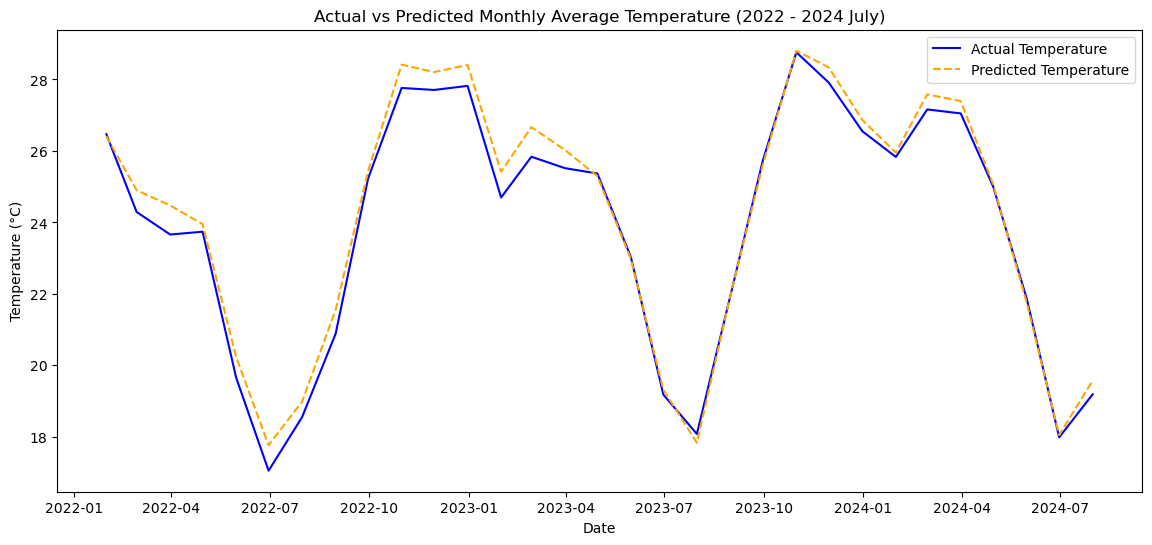

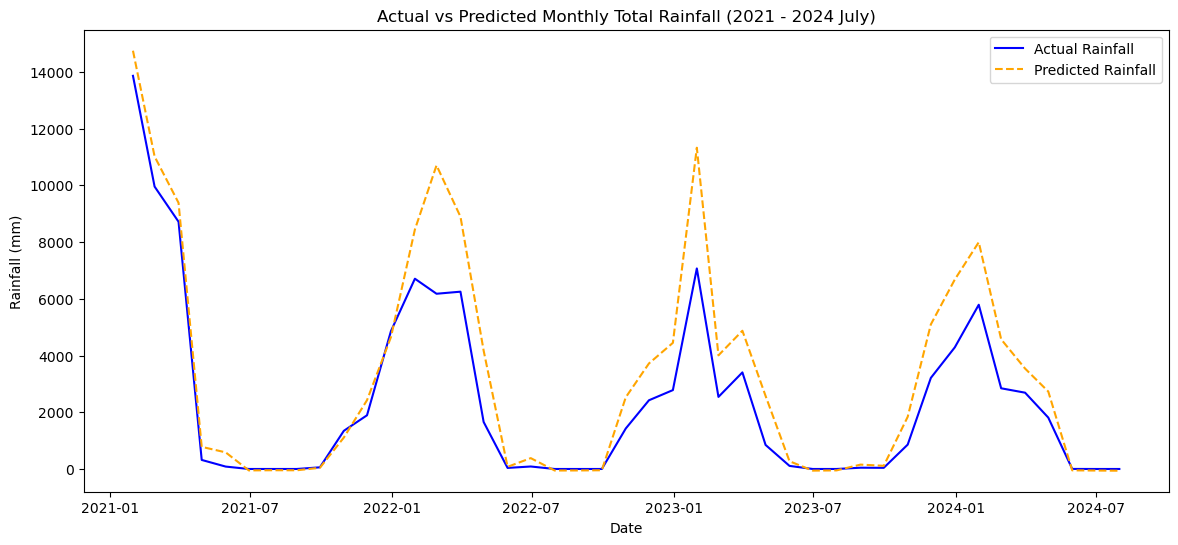

In [17]:
import matplotlib.pyplot as plt

# Resample to monthly averages/sums for better clarity
# Temperature Prediction (Monthly Average, 2022 - 2024 July)
temp_test_monthly = y_test_temp.resample('M').mean()
temp_pred_monthly = pd.Series(temp_pred, index=y_test_temp.index).resample('M').mean()

# Rainfall Prediction (Monthly Total, 2021 - 2024 July)
rain_test_monthly = y_test_rain.resample('M').sum()
rain_pred_monthly = pd.Series(rain_pred, index=y_test_rain.index).resample('M').sum()

# Plotting Actual vs. Predicted for Temperature (Monthly)
plt.figure(figsize=(14, 6))
plt.plot(temp_test_monthly.index, temp_test_monthly, label="Actual Temperature", color="blue")
plt.plot(temp_pred_monthly.index, temp_pred_monthly, label="Predicted Temperature", color="orange", linestyle="--")
plt.title("Actual vs Predicted Monthly Average Temperature (2022 - 2024 July)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Plotting Actual vs. Predicted for Rainfall (Monthly)
plt.figure(figsize=(14, 6))
plt.plot(rain_test_monthly.index, rain_test_monthly, label="Actual Rainfall", color="blue")
plt.plot(rain_pred_monthly.index, rain_pred_monthly, label="Predicted Rainfall", color="orange", linestyle="--")
plt.title("Actual vs Predicted Monthly Total Rainfall (2021 - 2024 July)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


Ensemble Model - Rainfall Prediction Evaluation Metrics:
MAE: 3.180
RMSE: 8.488
R2: 0.454


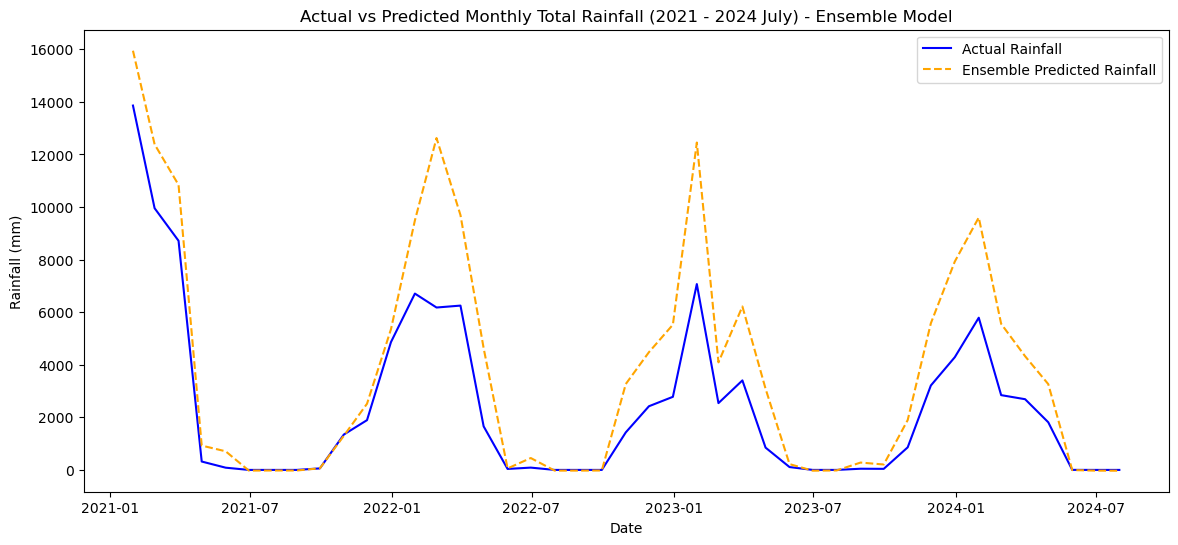

In [18]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Define and train individual models for rainfall prediction
gradient_model = GradientBoostingRegressor()
random_forest_model = RandomForestRegressor()

# Train models on the training data for rainfall
gradient_model.fit(X_train_rain, y_train_rain)
random_forest_model.fit(X_train_rain, y_train_rain)

# Predict on the validation set with each model
gradient_pred = gradient_model.predict(X_test_rain)
random_forest_pred = random_forest_model.predict(X_test_rain)

# Ensemble Prediction (average of Gradient Boosting and Random Forest predictions)
ensemble_pred = (gradient_pred + random_forest_pred) / 2

# Evaluation of Ensemble Model
mae = mean_absolute_error(y_test_rain, ensemble_pred)
rmse = np.sqrt(mean_squared_error(y_test_rain, ensemble_pred))
r2 = r2_score(y_test_rain, ensemble_pred)

print("Ensemble Model - Rainfall Prediction Evaluation Metrics:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")

# Resample actual and predicted values to monthly totals for clearer plotting
rain_test_monthly = y_test_rain.resample('M').sum()
ensemble_pred_series = pd.Series(ensemble_pred, index=y_test_rain.index).resample('M').sum()

# Plotting Actual vs. Predicted for Rainfall (Monthly)
plt.figure(figsize=(14, 6))
plt.plot(rain_test_monthly.index, rain_test_monthly, label="Actual Rainfall", color="blue")
plt.plot(ensemble_pred_series.index, ensemble_pred_series, label="Ensemble Predicted Rainfall", color="orange", linestyle="--")
plt.title("Actual vs Predicted Monthly Total Rainfall (2021 - 2024 July) - Ensemble Model")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
Best parameters for Random Forest: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}

Tuned Ensemble Model - Rainfall Prediction Evaluation Metrics (Averaging):
MAE: 3.077
RMSE: 8.681
R2: 0.429

Stacked Ensemble Model - Rainfall Prediction Evaluation Metrics:
MAE: 3.484
RMSE: 9.431
R2: 0.326


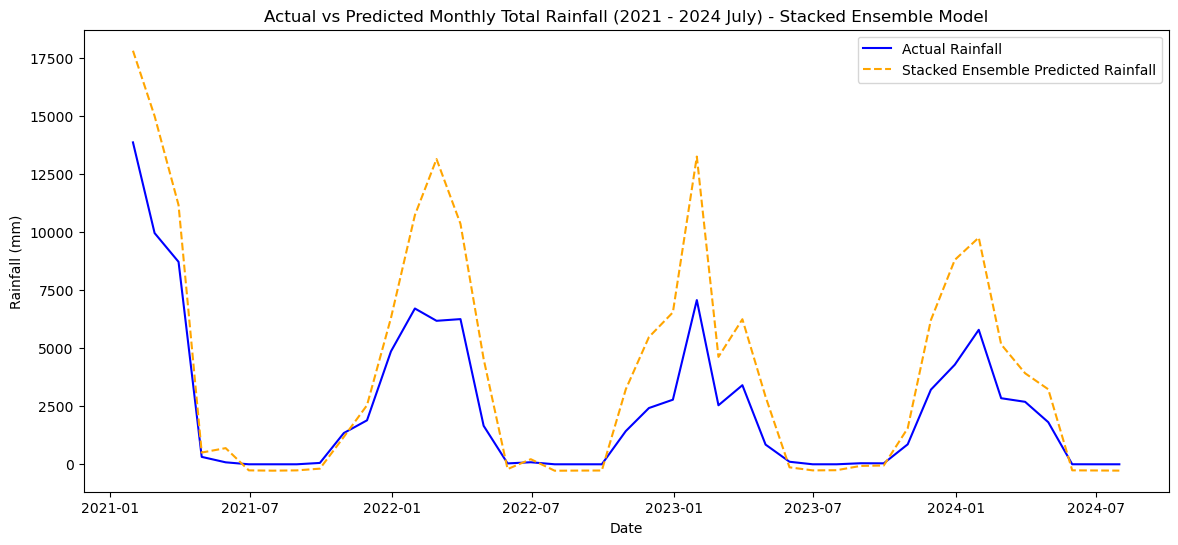

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', low_memory=False)
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('datetime', inplace=True)

# Define features and target for rainfall prediction
features = df.drop(['tempavg', 'precip', 'StationName', 'temp_label', 'precip_label'], axis=1)
rainfall_target = df['precip']

# Split data into train and test sets for rainfall
rainfall_train = df[(df.index.year >= 2010) & (df.index.year <= 2020)]
rainfall_test = df[(df.index.year >= 2021) & (df.index <= '2024-07-31')]
X_train_rain, X_test_rain = rainfall_train[features.columns], rainfall_test[features.columns]
y_train_rain, y_test_rain = rainfall_train['precip'], rainfall_test['precip']

# Step 1: Hyperparameter Tuning for Gradient Boosting and Random Forest
# Define parameter grids
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize models
gradient_model = GradientBoostingRegressor()
random_forest_model = RandomForestRegressor()

# Set up GridSearchCV
grid_search_gb = GridSearchCV(gradient_model, param_grid_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf = GridSearchCV(random_forest_model, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Train with Grid Search
grid_search_gb.fit(X_train_rain, y_train_rain)
grid_search_rf.fit(X_train_rain, y_train_rain)

# Get best models after tuning
best_gradient_model = grid_search_gb.best_estimator_
best_random_forest_model = grid_search_rf.best_estimator_

# Display best parameters
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Step 2: Ensemble Prediction with Tuned Models (Averaging)
tuned_gradient_pred = best_gradient_model.predict(X_test_rain)
tuned_random_forest_pred = best_random_forest_model.predict(X_test_rain)

# Averaging Ensemble
tuned_ensemble_pred = (tuned_gradient_pred + tuned_random_forest_pred) / 2

# Evaluate the Averaging Ensemble Model
mae = mean_absolute_error(y_test_rain, tuned_ensemble_pred)
rmse = np.sqrt(mean_squared_error(y_test_rain, tuned_ensemble_pred))
r2 = r2_score(y_test_rain, tuned_ensemble_pred)

print("\nTuned Ensemble Model - Rainfall Prediction Evaluation Metrics (Averaging):")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")

# Step 3: Stacking Ensemble with a Meta-Model
# Generate predictions from each tuned model for the training set
tuned_gradient_pred_train = best_gradient_model.predict(X_train_rain)
tuned_random_forest_pred_train = best_random_forest_model.predict(X_train_rain)

# Create a new dataset using predictions as features for the meta-model
stacked_train = np.column_stack((tuned_gradient_pred_train, tuned_random_forest_pred_train))
stacked_test = np.column_stack((tuned_gradient_pred, tuned_random_forest_pred))

# Train the meta-model on the stacked dataset
meta_model = LinearRegression()
meta_model.fit(stacked_train, y_train_rain)

# Make final predictions using the meta-model
stacked_ensemble_pred = meta_model.predict(stacked_test)

# Evaluate the Stacked Ensemble Model
mae_stacked = mean_absolute_error(y_test_rain, stacked_ensemble_pred)
rmse_stacked = np.sqrt(mean_squared_error(y_test_rain, stacked_ensemble_pred))
r2_stacked = r2_score(y_test_rain, stacked_ensemble_pred)

print("\nStacked Ensemble Model - Rainfall Prediction Evaluation Metrics:")
print(f"MAE: {mae_stacked:.3f}")
print(f"RMSE: {rmse_stacked:.3f}")
print(f"R2: {r2_stacked:.3f}")

# Step 4: Plotting Actual vs. Predicted for Stacked Ensemble
# Resample actual and predicted values to monthly totals for clearer plotting
rain_test_monthly = y_test_rain.resample('M').sum()
stacked_ensemble_pred_series = pd.Series(stacked_ensemble_pred, index=y_test_rain.index).resample('M').sum()

# Plotting Actual vs. Predicted for Rainfall (Monthly)
plt.figure(figsize=(14, 6))
plt.plot(rain_test_monthly.index, rain_test_monthly, label="Actual Rainfall", color="blue")
plt.plot(stacked_ensemble_pred_series.index, stacked_ensemble_pred_series, label="Stacked Ensemble Predicted Rainfall", color="orange", linestyle="--")
plt.title("Actual vs Predicted Monthly Total Rainfall (2021 - 2024 July) - Stacked Ensemble Model")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', low_memory=False)
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('datetime', inplace=True)

# Add a time index to capture long-term trend
df['time_index'] = np.arange(len(df))

# Define features and target for temperature prediction
features = df.drop(['tempavg', 'precip', 'StationName', 'temp_label', 'precip_label'], axis=1)
features['time_index'] = df['time_index']  # Add the time index as a feature
temperature_target = df['tempavg']

# Split data for training (2003 - 2024 July)
temperature_train = df[(df.index.year >= 2003) & (df.index <= '2024-07-31')]
X_train_temp = temperature_train[features.columns]
y_train_temp = temperature_train['tempavg']

# Initialize and train the Gradient Boosting Regressor with trend feature
gradient_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=7, n_estimators=150)
gradient_model.fit(X_train_temp, y_train_temp)

# Generate future dates and add time index for the next 5 years (starting from August 2024)
future_dates = pd.date_range(start='2024-08-01', periods=60, freq='M')
future_time_index = np.arange(len(df), len(df) + 60)  # Extend the time index for future

# Prepare future features, including time_index
future_features = pd.DataFrame({
    'month': future_dates.month,
    'year': future_dates.year,
    'time_index': future_time_index
})

# Ensure future_features has all the same columns as X_train_temp, using average values where necessary
for col in X_train_temp.columns:
    if col not in future_features:
        future_features[col] = X_train_temp[col].mean()

# Reorder columns to match the training data exactly
future_features = future_features[X_train_temp.columns]

# Predict future temperature using the model with trend
future_temperature_predictions = gradient_model.predict(future_features)

# Combine historical and future data for plotting
historical_temperature = df['tempavg']
future_temperature_series = pd.Series(future_temperature_predictions, index=future_dates)

# Resample historical data to monthly averages for clearer visualization
historical_temperature_monthly = historical_temperature.resample('M').mean()

# Plot the resampled historical and predicted future temperatures
plt.figure(figsize=(14, 6))
plt.plot(historical_temperature_monthly.index, historical_temperature_monthly, label="Historical Monthly Average Temperature", color="blue")
plt.plot(future_temperature_series.index, future_temperature_series, label="Predicted Temperature with Trend (2024-2029)", color="orange", linestyle="--")
plt.title("Historical and Predicted Average Temperature with Upward Trend (2003 - 2029)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


Ensemble Model (Gradient Boosting, Random Forest, XGBoost) - Rainfall Prediction Evaluation Metrics:
MAE: 3.039
RMSE: 8.706
R2: 0.426


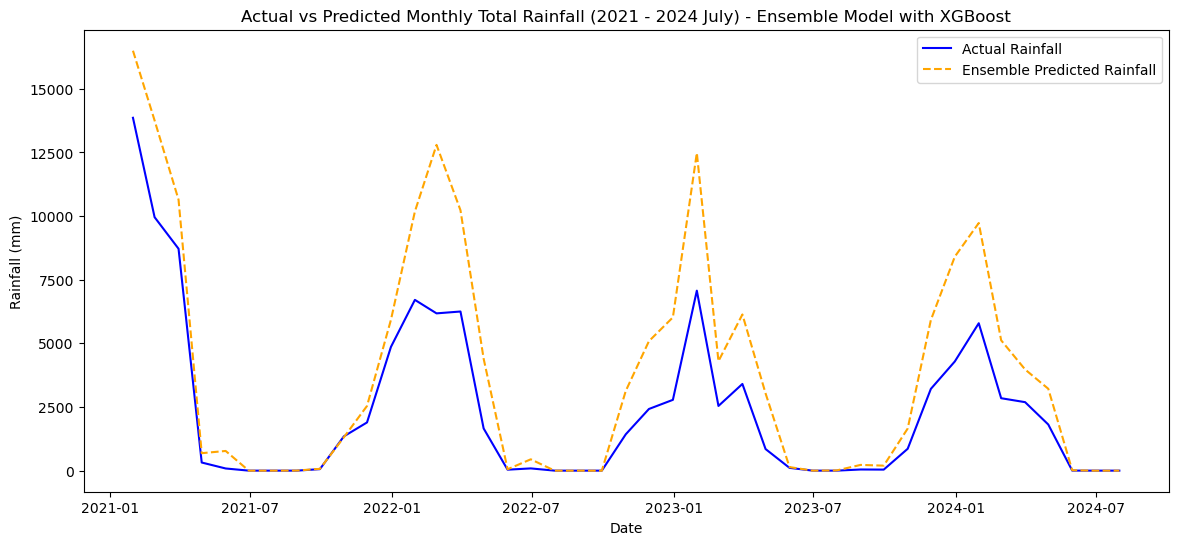

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', low_memory=False)
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('datetime', inplace=True)

# Define features and target for rainfall prediction
features = df.drop(['tempavg', 'precip', 'StationName', 'temp_label', 'precip_label'], axis=1)
rainfall_target = df['precip']

# Split data into train and test sets for rainfall
rainfall_train = df[(df.index.year >= 2010) & (df.index.year <= 2020)]
rainfall_test = df[(df.index.year >= 2021) & (df.index <= '2024-07-31')]
X_train_rain, X_test_rain = rainfall_train[features.columns], rainfall_test[features.columns]
y_train_rain, y_test_rain = rainfall_train['precip'], rainfall_test['precip']

# Initialize models
gradient_model = GradientBoostingRegressor(learning_rate=0.2, max_depth=7, n_estimators=150)
random_forest_model = RandomForestRegressor(max_depth=15, min_samples_split=2, n_estimators=300)
xgboost_model = XGBRegressor(objective='reg:squarederror', learning_rate=0.1, max_depth=7, n_estimators=150)

# Train models on the training data for rainfall
gradient_model.fit(X_train_rain, y_train_rain)
random_forest_model.fit(X_train_rain, y_train_rain)
xgboost_model.fit(X_train_rain, y_train_rain)

# Predict on the validation set with each model
gradient_pred = gradient_model.predict(X_test_rain)
random_forest_pred = random_forest_model.predict(X_test_rain)
xgboost_pred = xgboost_model.predict(X_test_rain)

# Ensemble Prediction (average of Gradient Boosting, Random Forest, and XGBoost predictions)
ensemble_pred = (gradient_pred + random_forest_pred + xgboost_pred) / 3

# Evaluation of Ensemble Model
mae = mean_absolute_error(y_test_rain, ensemble_pred)
rmse = np.sqrt(mean_squared_error(y_test_rain, ensemble_pred))
r2 = r2_score(y_test_rain, ensemble_pred)

print("Ensemble Model (Gradient Boosting, Random Forest, XGBoost) - Rainfall Prediction Evaluation Metrics:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")

# Resample actual and predicted values to monthly totals for clearer plotting
rain_test_monthly = y_test_rain.resample('M').sum()
ensemble_pred_series = pd.Series(ensemble_pred, index=y_test_rain.index).resample('M').sum()

# Plotting Actual vs. Predicted for Rainfall (Monthly)
plt.figure(figsize=(14, 6))
plt.plot(rain_test_monthly.index, rain_test_monthly, label="Actual Rainfall", color="blue")
plt.plot(ensemble_pred_series.index, ensemble_pred_series, label="Ensemble Predicted Rainfall", color="orange", linestyle="--")
plt.title("Actual vs Predicted Monthly Total Rainfall (2021 - 2024 July) - Ensemble Model with XGBoost")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


C:\Users\26485\AppData\Local\Temp\ipykernel_14740\856259508.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_temp = temperature_data['tempavg'].resample('M').mean()


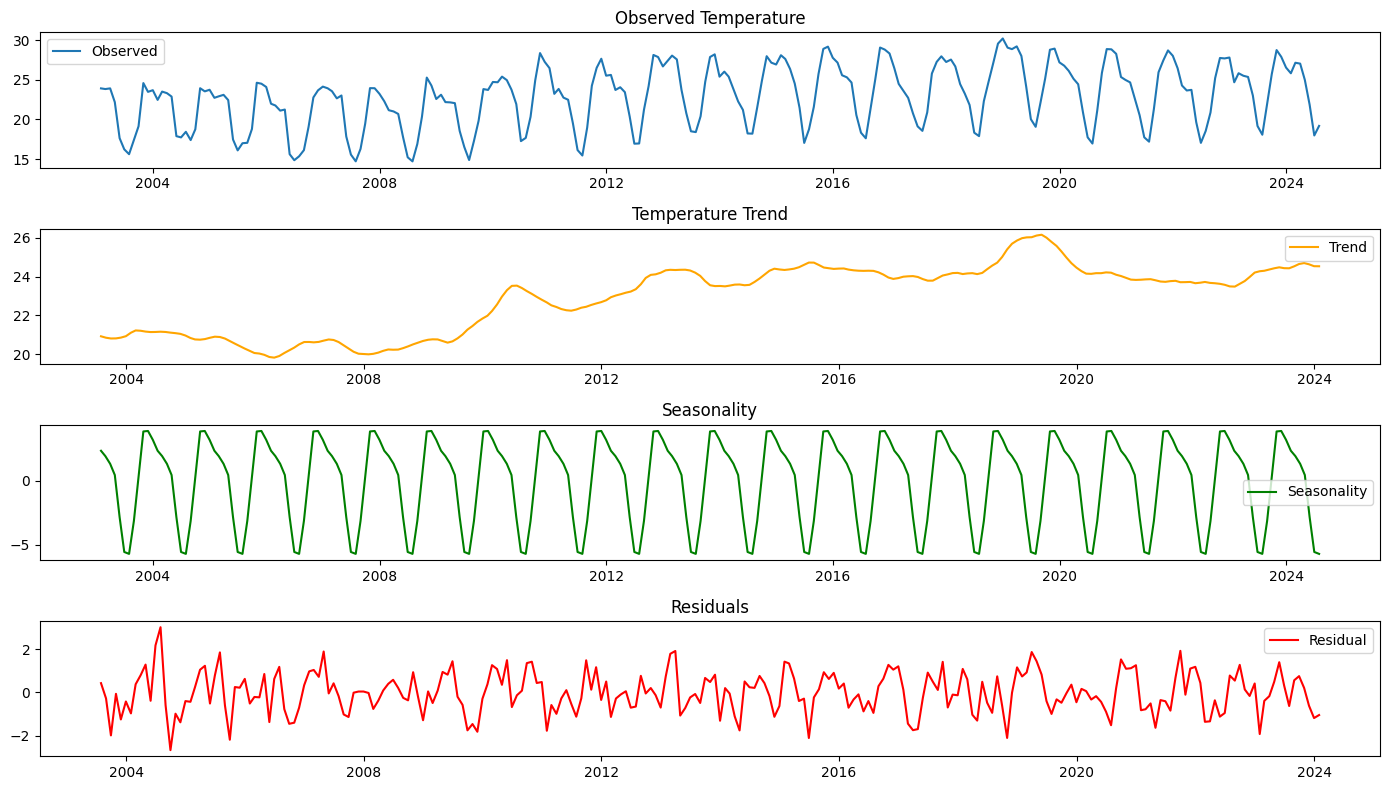

C:\Users\26485\AppData\Local\Temp\ipykernel_14740\856259508.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_data['month'] = temperature_data.index.month
C:\Users\26485\AppData\Local\Temp\ipykernel_14740\856259508.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperature_data['year'] = temperature_data.index.year
C:\Users\26485\AppData\Local\Temp\ipykernel_14740\856259508.py:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future

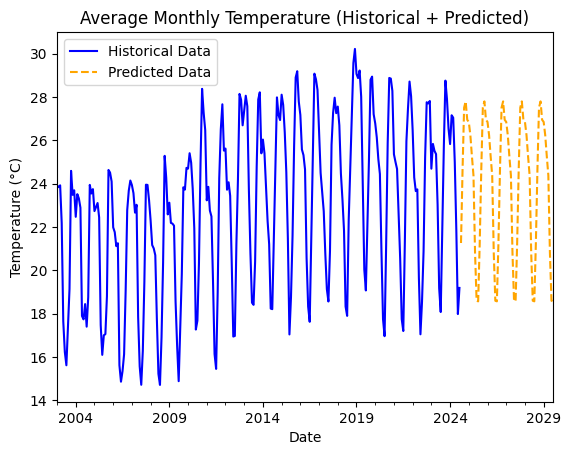

C:\Users\26485\AppData\Local\Temp\ipykernel_14740\856259508.py:88: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_avg_temp = temperature_data['tempavg'].resample('Y').mean()
C:\Users\26485\AppData\Local\Temp\ipykernel_14740\856259508.py:89: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_annual_avg_temp = future_df['tempavg'].resample('Y').mean()


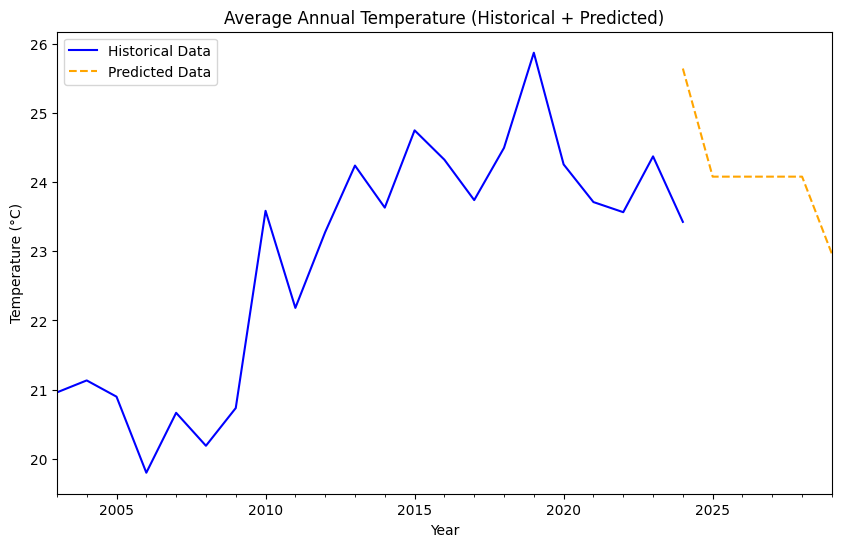

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', low_memory=False)

# Create a 'datetime' column and set it as the index
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1), errors='coerce')
df.dropna(subset=['datetime'], inplace=True)  # Remove rows with NaT in datetime column
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)  # Ensure datetime index is sorted

# Filter data for temperature (2003 - 2024 July)
temperature_data = df['2003-01-01':'2024-07-31']

# Perform Seasonal Decomposition
monthly_avg_temp = temperature_data['tempavg'].resample('M').mean()
decomposition = seasonal_decompose(monthly_avg_temp, model='additive', period=12)

# Plot the Seasonal Decomposition components
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed Temperature')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Temperature Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

# Feature Engineering - Extract month and year as separate features
temperature_data['month'] = temperature_data.index.month
temperature_data['year'] = temperature_data.index.year

# Define features and target
X = temperature_data[['month', 'year']]
y = temperature_data['tempavg']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Generate future dates for prediction (next 5 years)
future_dates = pd.date_range(start='2024-08-01', end='2029-07-31', freq='M')
future_data = pd.DataFrame({
    'month': future_dates.month,
    'year': future_dates.year
})

# Predict future temperatures
future_temps = model.predict(future_data)

# Combine future dates with predicted temperatures
future_df = pd.DataFrame({'datetime': future_dates, 'tempavg': future_temps})
future_df.set_index('datetime', inplace=True)

# Plot Average Monthly Temperature (Historical + Predicted)
monthly_avg_temp.plot(label='Historical Data', color='blue')
future_df['tempavg'].plot(label='Predicted Data', color='orange', linestyle='--')
plt.title('Average Monthly Temperature (Historical + Predicted)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Plot Average Annual Temperature (Historical + Predicted)
annual_avg_temp = temperature_data['tempavg'].resample('Y').mean()
future_annual_avg_temp = future_df['tempavg'].resample('Y').mean()
plt.figure(figsize=(10, 6))
annual_avg_temp.plot(label='Historical Data', color='blue')
future_annual_avg_temp.plot(label='Predicted Data', color='orange', linestyle='--')
plt.title('Average Annual Temperature (Historical + Predicted)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
MAE: 0.6406956990458521
RMSE: 0.949122402478791
R2 Score: 0.9429871986712579


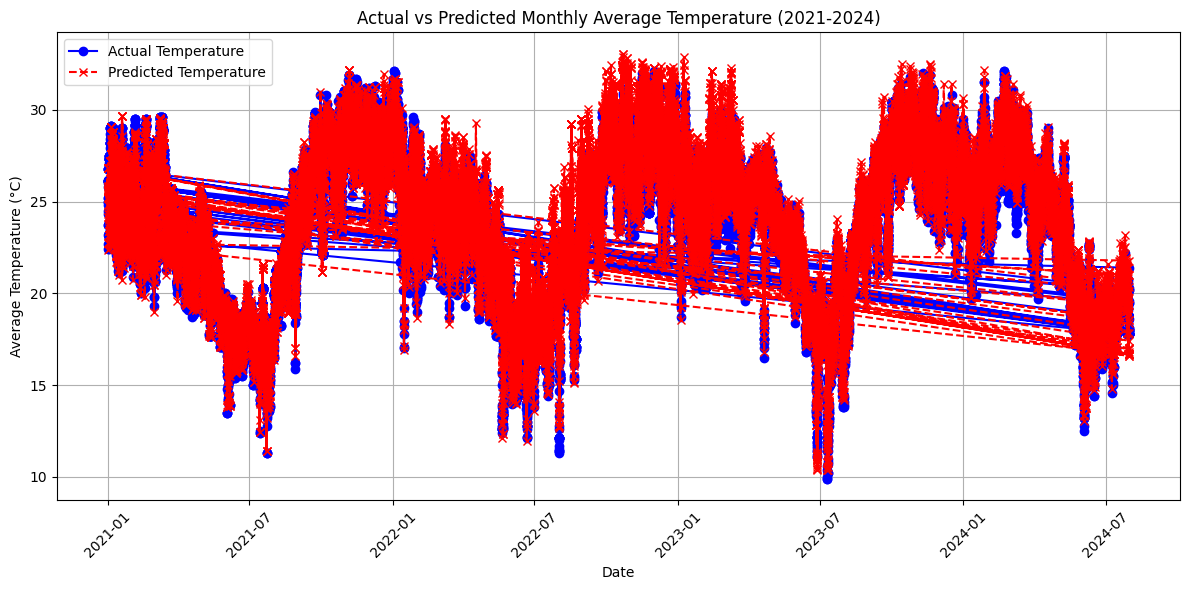

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset and specify the 'datetime' column to be of type string
df = pd.read_csv('df1 (1).csv', dtype={'datetime': str}, low_memory=False)

# Convert the 'datetime' column to pandas datetime format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df.dropna(subset=['datetime'], inplace=True)  # Drop rows with invalid dates

# Filter the dataset to only include data between 2004 and 2024
df_filtered = df[(df['datetime'].dt.year >= 2004) & (df['datetime'].dt.year <= 2024)]

# Select relevant columns for temperature prediction
features = ['tempmax', 'tempmin', 'precip', 'precipprob', 'precipcover', 'cloudcover', 'windspeed']
target = 'tempavg'

# Split the data into training and testing sets
train_data = df_filtered[df_filtered['datetime'].dt.year < 2021]
test_data = df_filtered[df_filtered['datetime'].dt.year >= 2021]

X_train = train_data[features]
y_train = train_data[target]

X_test = test_data[features]
y_test = test_data[target]

# Define the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Hyperparameter tuning using RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'subsample': [0.8, 1.0]
}

# Use RandomizedSearchCV for faster tuning
random_search = RandomizedSearchCV(
    estimator=gbr, param_distributions=param_grid,
    n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42  # Adjusted n_iter and cv for faster tuning
)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Best estimator after tuning
best_gbr = random_search.best_estimator_

# Predict on test data (2021 - 2024)
y_pred = best_gbr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

# Plotting actual vs predicted average temperature
plt.figure(figsize=(12, 6))
plt.plot(test_data['datetime'], y_test, label='Actual Temperature', marker='o', color='blue')
plt.plot(test_data['datetime'], y_pred, label='Predicted Temperature', marker='x', color='red', linestyle='--')
plt.title('Actual vs Predicted Monthly Average Temperature (2021-2024)')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\26485\AppData\Local\Temp\ipykernel_14740\873314106.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M').mean()
C:\Users\26485\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Rainfall Prediction Evaluation (SARIMAX + XGBoost):
MAE: 1018.196
RMSE: 1609.535
R2: 0.419


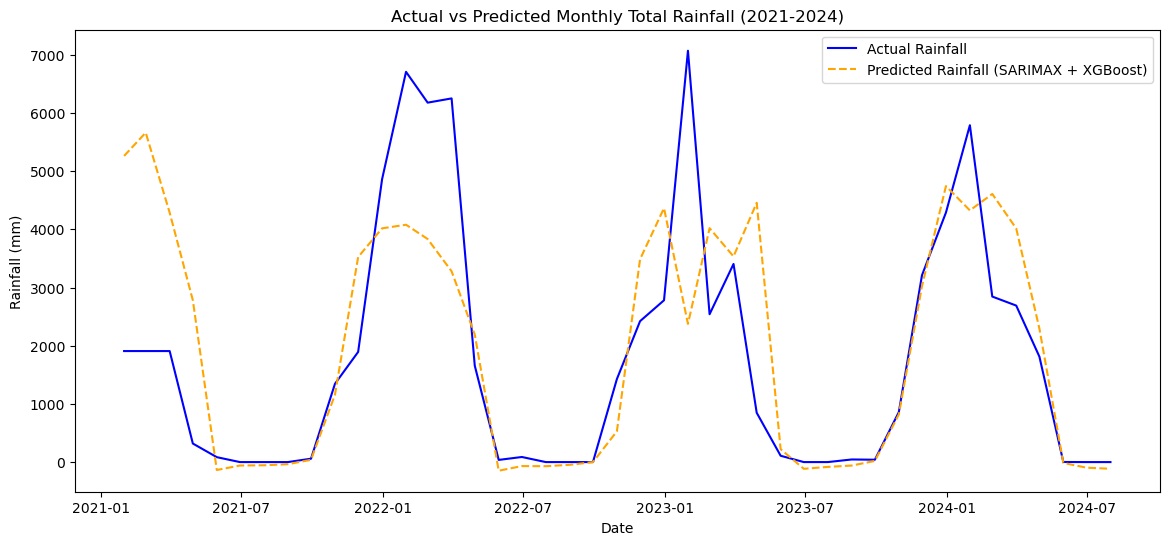

C:\Users\26485\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Temperature Prediction Evaluation (SARIMAX + Gradient Boosting):
MAE: 0.017
RMSE: 0.023
R2: 1.000


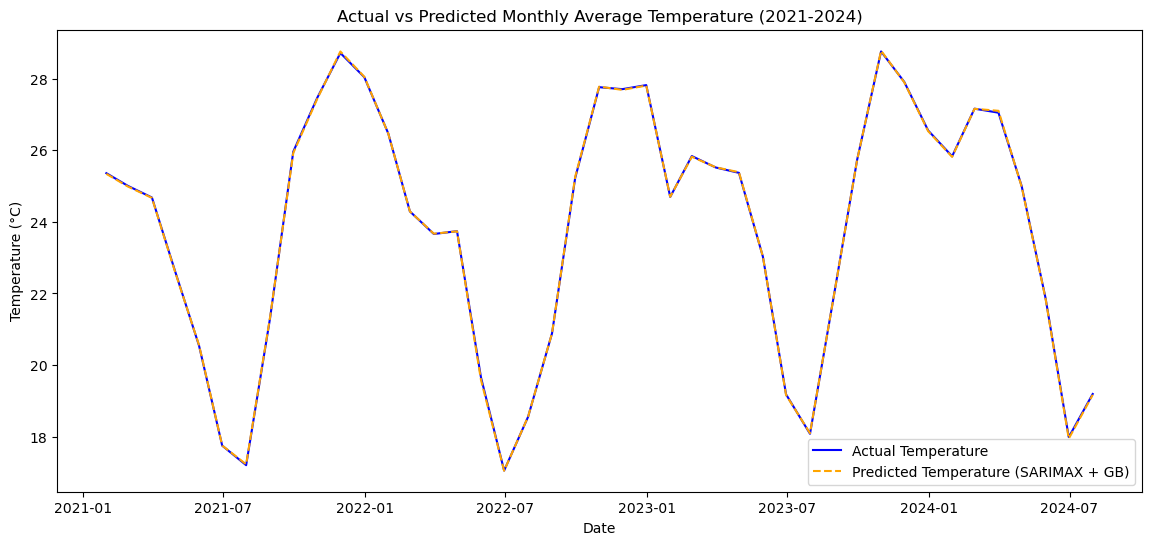

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', low_memory=False)
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('datetime', inplace=True)

# Downsample data to monthly for reduced memory usage
df_monthly = df.resample('M').mean()
df_monthly['precip'] = df['precip'].resample('M').sum()

# Feature Engineering: Create lagged rainfall variable
df_monthly['prev_month_rainfall'] = df_monthly['precip'].shift(1)
df_monthly = df_monthly.dropna()  # Drop rows with NaN values after lagging

# Identify and handle outliers in rainfall using IQR
Q1 = df_monthly['precip'].quantile(0.25)
Q3 = df_monthly['precip'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR
df_monthly['precip'] = np.where(
    (df_monthly['precip'] < outlier_threshold_low) | (df_monthly['precip'] > outlier_threshold_high),
    df_monthly['precip'].median(),
    df_monthly['precip']
)

# Define target variables for rainfall and temperature
rainfall_target = df_monthly['precip']
temperature_target = df_monthly['tempavg']

# Split data for training and testing
train_end = '2020-12-31'
test_start = '2021-01-01'
rainfall_train = rainfall_target[:train_end]
rainfall_test = rainfall_target[test_start:]
temperature_train = temperature_target[:train_end]
temperature_test = temperature_target[test_start:]

# Define features
features = df_monthly[['tempavg', 'windspeed', 'prev_month_rainfall']]

X_train_rain = features[:train_end]
X_test_rain = features[test_start:]
X_train_temp = X_train_rain  # Same features for temperature
X_test_temp = X_test_rain

### Part 1: Rainfall Prediction with SARIMAX and XGBoost ###

# SARIMAX Model for Rainfall (tuned parameters)
sarimax_model_rainfall = SARIMAX(rainfall_train, exog=X_train_rain, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results_rainfall = sarimax_model_rainfall.fit(low_memory=True)

# SARIMAX Predictions
sarimax_pred_rainfall = sarimax_results_rainfall.get_forecast(steps=len(rainfall_test), exog=X_test_rain).predicted_mean

# XGBoost Model for Rainfall
xgboost_rain = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgboost_rain.fit(X_train_rain, rainfall_train)
xgboost_pred_rainfall = xgboost_rain.predict(X_test_rain)

# Ensemble Prediction (SARIMAX + XGBoost)
ensemble_pred_rainfall = (sarimax_pred_rainfall + xgboost_pred_rainfall) / 2

# Evaluate Rainfall Predictions
mae_rainfall = mean_absolute_error(rainfall_test, ensemble_pred_rainfall)
rmse_rainfall = np.sqrt(mean_squared_error(rainfall_test, ensemble_pred_rainfall))
r2_rainfall = r2_score(rainfall_test, ensemble_pred_rainfall)

print("Rainfall Prediction Evaluation (SARIMAX + XGBoost):")
print(f"MAE: {mae_rainfall:.3f}")
print(f"RMSE: {rmse_rainfall:.3f}")
print(f"R2: {r2_rainfall:.3f}")

# Plot Actual vs Predicted Rainfall
plt.figure(figsize=(14, 6))
plt.plot(rainfall_test.index, rainfall_test, label="Actual Rainfall", color="blue")
plt.plot(rainfall_test.index, ensemble_pred_rainfall, label="Predicted Rainfall (SARIMAX + XGBoost)", color="orange", linestyle="--")
plt.title("Actual vs Predicted Monthly Total Rainfall (2021-2024)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()

### Part 2: Temperature Prediction with SARIMAX and Gradient Boosting ###

# SARIMAX Model for Temperature (tuned parameters)
sarimax_model_temp = SARIMAX(temperature_train, exog=X_train_temp, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results_temp = sarimax_model_temp.fit(low_memory=True)

# SARIMAX Predictions
sarimax_pred_temp = sarimax_results_temp.get_forecast(steps=len(temperature_test), exog=X_test_temp).predicted_mean

# Gradient Boosting Model for Temperature
gradient_boosting_temp = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
gradient_boosting_temp.fit(X_train_temp, temperature_train)
gb_pred_temp = gradient_boosting_temp.predict(X_test_temp)

# Ensemble Prediction (SARIMAX + Gradient Boosting)
ensemble_pred_temp = (sarimax_pred_temp + gb_pred_temp) / 2

# Evaluate Temperature Predictions
mae_temp = mean_absolute_error(temperature_test, ensemble_pred_temp)
rmse_temp = np.sqrt(mean_squared_error(temperature_test, ensemble_pred_temp))
r2_temp = r2_score(temperature_test, ensemble_pred_temp)

print("\nTemperature Prediction Evaluation (SARIMAX + Gradient Boosting):")
print(f"MAE: {mae_temp:.3f}")
print(f"RMSE: {rmse_temp:.3f}")
print(f"R2: {r2_temp:.3f}")

# Plot Actual vs Predicted Temperature
plt.figure(figsize=(14, 6))
plt.plot(temperature_test.index, temperature_test, label="Actual Temperature", color="blue")
plt.plot(temperature_test.index, ensemble_pred_temp, label="Predicted Temperature (SARIMAX + GB)", color="orange", linestyle="--")
plt.title("Actual vs Predicted Monthly Average Temperature (2021-2024)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


C:\Users\26485\AppData\Local\Temp\ipykernel_14740\1202558884.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M').mean()
C:\Users\26485\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\26485\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\26485\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

Cross-Validation Results (Temperature Prediction):
Average MAE: 0.124
Average RMSE: 0.209
Average R2: 0.995


C:\Users\26485\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


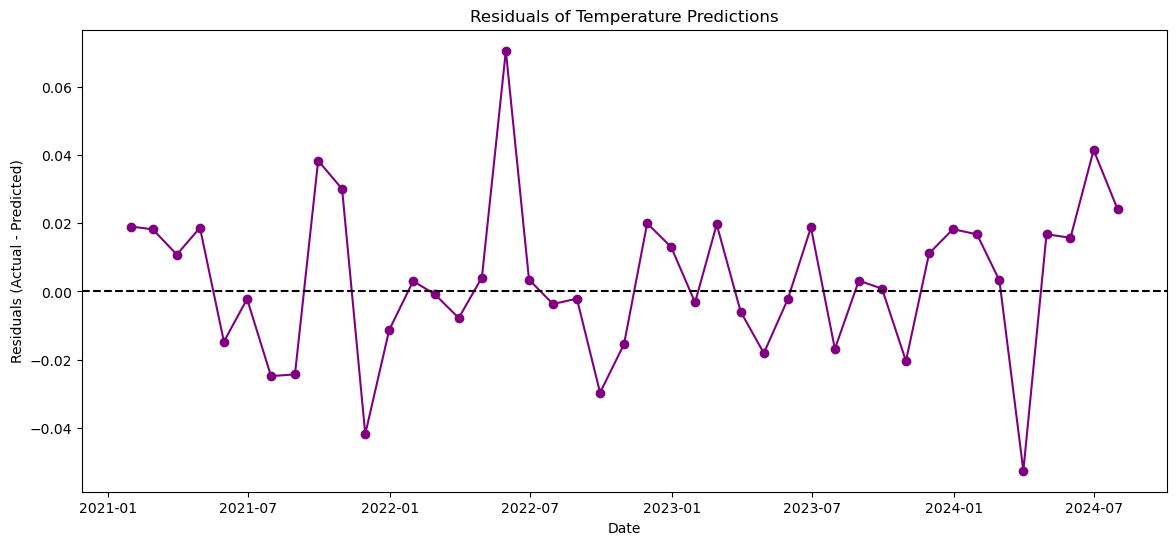

ValueError: Provided exogenous values are not of the appropriate shape. Required (60, 3), got (60, 5).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', low_memory=False)
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('datetime', inplace=True)

# Downsample data to monthly for reduced memory usage
df_monthly = df.resample('M').mean()
df_monthly['precip'] = df['precip'].resample('M').sum()

# Feature Engineering: Create lagged rainfall variable
df_monthly['prev_month_rainfall'] = df_monthly['precip'].shift(1)
df_monthly = df_monthly.dropna()

# Define target variable for temperature
temperature_target = df_monthly['tempavg']

# Prepare features for temperature prediction
features = df_monthly[['tempavg', 'windspeed', 'prev_month_rainfall']]

X = features
y = temperature_target

# Cross-validation with TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
mae_scores, rmse_scores, r2_scores = [], [], []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # SARIMAX Model for Temperature
    sarimax_model_temp = SARIMAX(y_train, exog=X_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    sarimax_results_temp = sarimax_model_temp.fit(low_memory=True)
    sarimax_pred_temp = sarimax_results_temp.get_forecast(steps=len(y_test), exog=X_test).predicted_mean
    
    # Gradient Boosting Model for Temperature
    gradient_boosting_temp = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
    gradient_boosting_temp.fit(X_train, y_train)
    gb_pred_temp = gradient_boosting_temp.predict(X_test)
    
    # Ensemble Prediction
    ensemble_pred_temp = (sarimax_pred_temp + gb_pred_temp) / 2
    
    # Evaluation Metrics
    mae = mean_absolute_error(y_test, ensemble_pred_temp)
    rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred_temp))
    r2 = r2_score(y_test, ensemble_pred_temp)
    
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Print Cross-Validation Results
print("Cross-Validation Results (Temperature Prediction):")
print(f"Average MAE: {np.mean(mae_scores):.3f}")
print(f"Average RMSE: {np.mean(rmse_scores):.3f}")
print(f"Average R2: {np.mean(r2_scores):.3f}")

# Residual Analysis on Full Training Set
train_end = '2020-12-31'
test_start = '2021-01-01'
temperature_train = temperature_target[:train_end]
temperature_test = temperature_target[test_start:]
X_train_temp = X[:train_end]
X_test_temp = X[test_start:]

# Train the model on the full training set
sarimax_model_temp = SARIMAX(temperature_train, exog=X_train_temp, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results_temp = sarimax_model_temp.fit(low_memory=True)
sarimax_pred_temp = sarimax_results_temp.get_forecast(steps=len(temperature_test), exog=X_test_temp).predicted_mean

gradient_boosting_temp = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
gradient_boosting_temp.fit(X_train_temp, temperature_train)
gb_pred_temp = gradient_boosting_temp.predict(X_test_temp)

# Ensemble Prediction
ensemble_pred_temp = (sarimax_pred_temp + gb_pred_temp) / 2
residuals = temperature_test - ensemble_pred_temp

# Plot Residuals
plt.figure(figsize=(14, 6))
plt.plot(residuals.index, residuals, marker='o', linestyle='-', color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.title("Residuals of Temperature Predictions")
plt.xlabel("Date")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

# Forecast for the Next 5 Years (2024-2029)
future_dates = pd.date_range(start='2024-08-01', periods=60, freq='M')
future_time_index = np.arange(len(df), len(df) + 60)

# Prepare future features
future_features = pd.DataFrame({
    'month': future_dates.month,
    'year': future_dates.year,
    'tempavg': X['tempavg'].mean(),
    'windspeed': X['windspeed'].mean(),
    'prev_month_rainfall': X['prev_month_rainfall'].mean()
}, index=future_dates)

# Predict future temperature with SARIMAX and Gradient Boosting
sarimax_future_temp = sarimax_results_temp.get_forecast(steps=60, exog=future_features).predicted_mean
gb_future_temp = gradient_boosting_temp.predict(future_features)

# Ensemble Future Prediction (SARIMAX + Gradient Boosting)
ensemble_future_temp = (sarimax_future_temp + gb_future_temp) / 2

# Combine historical and future data for plotting
historical_temperature = temperature_target
future_temperature_series = pd.Series(ensemble_future_temp, index=future_dates)

# Plot Historical and Forecasted Temperature
plt.figure(figsize=(14, 6))
plt.plot(historical_temperature.index, historical_temperature, label="Historical Monthly Average Temperature", color="blue")
plt.plot(future_temperature_series.index, future_temperature_series, label="Predicted Temperature (2024-2029)", color="orange", linestyle="--")
plt.title("Historical and Predicted Average Temperature (2003 - 2029)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


C:\Users\26485\AppData\Local\Temp\ipykernel_14740\2202068801.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly = df.resample('M').mean()
C:\Users\26485\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


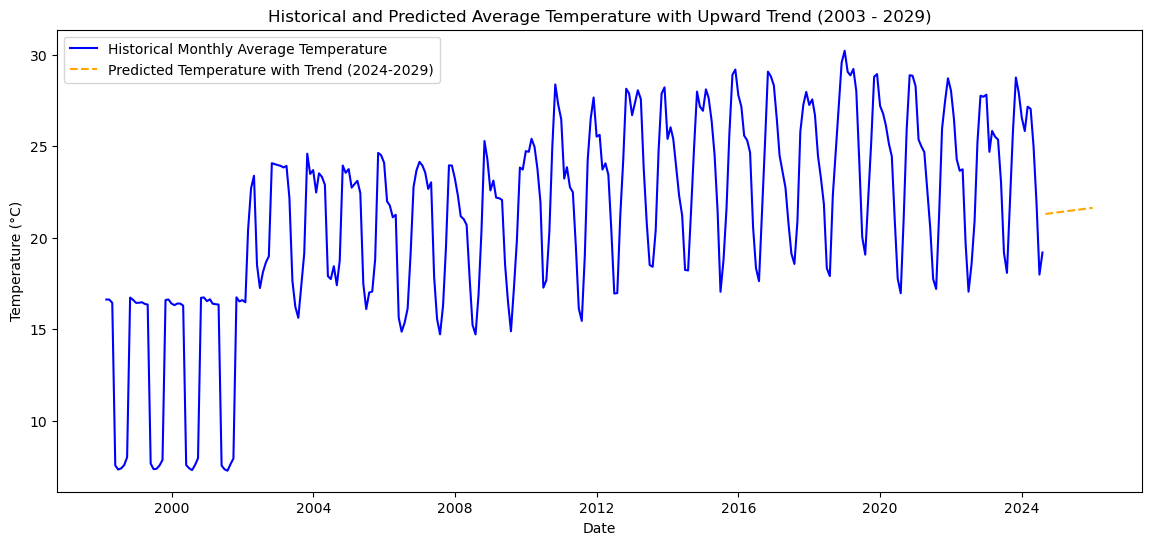

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import GradientBoostingRegressor

# Load and prepare the dataset
df = pd.read_csv('df1 (1).csv', low_memory=False)
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('datetime', inplace=True)

# Downsample data to monthly for reduced memory usage
df_monthly = df.resample('M').mean()
df_monthly['precip'] = df['precip'].resample('M').sum()

# Feature Engineering: Create lagged rainfall variable
df_monthly['prev_month_rainfall'] = df_monthly['precip'].shift(1)
df_monthly = df_monthly.dropna()

# Define target variable for temperature
temperature_target = df_monthly['tempavg']

# Prepare features for temperature prediction
features = df_monthly[['tempavg', 'windspeed', 'prev_month_rainfall']]
X = features
y = temperature_target

# Train the model on the full training set up to the current date
train_end = '2020-12-31'
test_start = '2021-01-01'
temperature_train = temperature_target[:train_end]
X_train_temp = X[:train_end]

# SARIMAX Model for Temperature (with trend and seasonality)
sarimax_model_temp = SARIMAX(temperature_train, exog=X_train_temp, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_results_temp = sarimax_model_temp.fit(low_memory=True)

# Gradient Boosting Model for Temperature
gradient_boosting_temp = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
gradient_boosting_temp.fit(X_train_temp, temperature_train)

# Forecast for the Next 5 Years (2024-2029) with Adjusted Trend
future_dates = pd.date_range(start='2024-08-01', periods=60, freq='M')

# Calculate a modest upward trend based on the recent data
recent_data_slope = (temperature_train[-12:].mean() - temperature_train[:12].mean()) / len(temperature_train) * 0.5

# Prepare future features with the correct number of columns
future_features = pd.DataFrame({
    'tempavg': X['tempavg'].mean(),
    'windspeed': X['windspeed'].mean(),
    'prev_month_rainfall': X['prev_month_rainfall'].mean()
}, index=future_dates)

# Predict future temperature with SARIMAX and Gradient Boosting
sarimax_future_temp = sarimax_results_temp.get_forecast(steps=60, exog=future_features).predicted_mean
gb_future_temp = gradient_boosting_temp.predict(future_features)

# Apply a modest linear trend incrementally over time
linear_trend_adjustment = pd.Series(np.arange(1, 61) * recent_data_slope, index=future_dates)

# Ensemble Future Prediction with Modest Trend Adjustment
ensemble_future_temp = ((sarimax_future_temp + gb_future_temp) / 2) + linear_trend_adjustment

# Combine historical and future data for plotting
historical_temperature = temperature_target
future_temperature_series = pd.Series(ensemble_future_temp, index=future_dates)

# Plot Historical and Forecasted Temperature
plt.figure(figsize=(14, 6))
plt.plot(historical_temperature.index, historical_temperature, label="Historical Monthly Average Temperature", color="blue")
plt.plot(future_temperature_series.index, future_temperature_series, label="Predicted Temperature with Trend (2024-2029)", color="orange", linestyle="--")
plt.title("Historical and Predicted Average Temperature with Upward Trend (2003 - 2029)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()


In [1]:
pip install tensorflow



  Using cached tensorflow-2.18.0-cp310-cp310-win_amd64.whl (7.5 kB)
  Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl (390.0 MB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached h5py-3.12.1-cp310-cp310-win_amd64.whl (3.0 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-win_amd64.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Using cached grpcio-1.67.1-cp310-cp310-win_amd64.whl (4.4 MB)
  Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached optree-0.13.0-cp310-cp310-win_amd64.whl (274 kB)
  Using cached rich-13.9.4-py3-none-any.whl (242 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5

In [5]:
%pip install --upgrade pandas numpy --user




Note: you may need to restart the kernel to use updated packages.


SARIMA Evaluation:
  MAE: 1458.433
  RMSE: 2131.740
  R-squared: 0.593

LSTM Evaluation:
  MAE: 1174.160
  RMSE: 1728.677
  R-squared: 0.732

Equal-weighted Ensemble Evaluation:
  MAE: 1127.596
  RMSE: 1739.892
  R-squared: 0.729

Weighted Ensemble (SARIMA 0.7, LSTM 0.3) Evaluation:
  MAE: 1214.143
  RMSE: 1859.214
  R-squared: 0.690



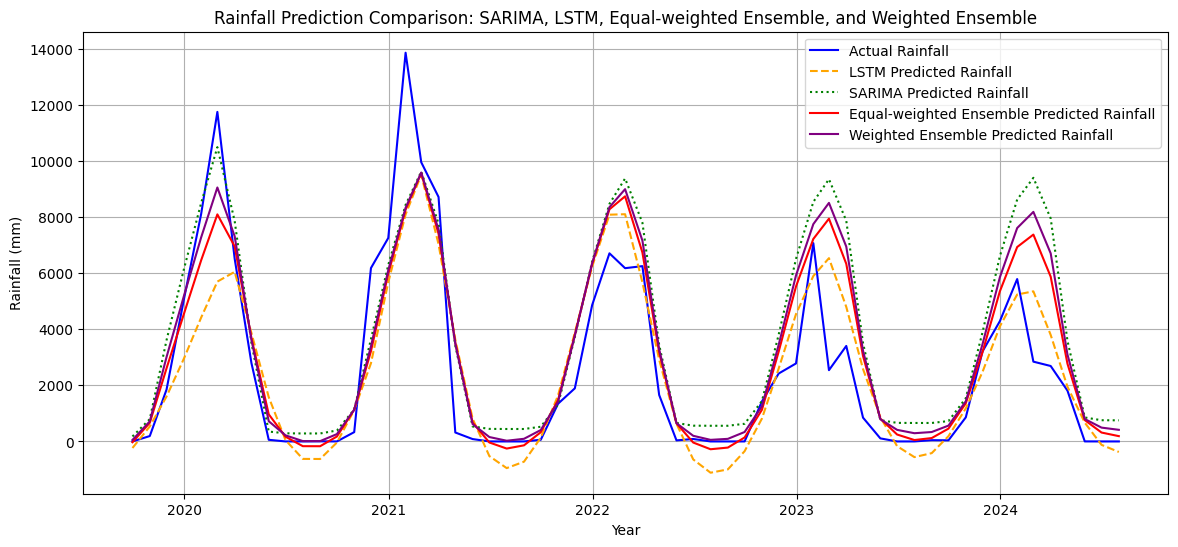

In [6]:
# Step 1: Import necessary libraries
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Calculate evaluation metrics for SARIMA, LSTM, and initial ensemble predictions
# Convert SARIMA, LSTM, and Ensemble predictions to 1D arrays for evaluation
sarima_pred_1d = sarima_pred.flatten()
lstm_pred_1d = rain_pred_lstm.flatten()
ensemble_pred_1d = ensemble_pred.flatten()
actual_rainfall = Y_rain_test_original.flatten()

# Define a function to calculate and print MAE, RMSE, and R-squared
def evaluate_model(predictions, actual, model_name):
    mae = mean_absolute_error(actual, predictions)
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    r2 = r2_score(actual, predictions)
    print(f"{model_name} Evaluation:")
    print(f"  MAE: {mae:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  R-squared: {r2:.3f}\n")
    return mae, rmse, r2

# Evaluation of each model
evaluate_model(sarima_pred_1d, actual_rainfall, "SARIMA")
evaluate_model(lstm_pred_1d, actual_rainfall, "LSTM")
evaluate_model(ensemble_pred_1d, actual_rainfall, "Equal-weighted Ensemble")

# Step 3: Implement the Weighted Ensemble (assign higher weight to SARIMA)
sarima_weight = 0.7
lstm_weight = 0.3
weighted_ensemble_pred = (sarima_weight * sarima_pred_1d) + (lstm_weight * lstm_pred_1d)

# Step 4: Evaluate the Weighted Ensemble
evaluate_model(weighted_ensemble_pred, actual_rainfall, "Weighted Ensemble (SARIMA 0.7, LSTM 0.3)")

# Step 5: Plot the results of all models for comparison
plt.figure(figsize=(14, 6))
plt.plot(date_indices, actual_rainfall, label="Actual Rainfall", color="blue")
plt.plot(date_indices, lstm_pred_1d, label="LSTM Predicted Rainfall", color="orange", linestyle="--")
plt.plot(date_indices, sarima_pred_1d, label="SARIMA Predicted Rainfall", color="green", linestyle=":")
plt.plot(date_indices, ensemble_pred_1d, label="Equal-weighted Ensemble Predicted Rainfall", color="red")
plt.plot(date_indices, weighted_ensemble_pred, label="Weighted Ensemble Predicted Rainfall", color="purple", linestyle="-")
plt.title("Rainfall Prediction Comparison: SARIMA, LSTM, Equal-weighted Ensemble, and Weighted Ensemble")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.show()


Best Ensemble Weights:
  SARIMA Weight: 0.20, LSTM Weight: 0.80
Best Ensemble Model Evaluation:
  MAE: 1108.138
  RMSE: 1681.220
  R-squared: 0.747


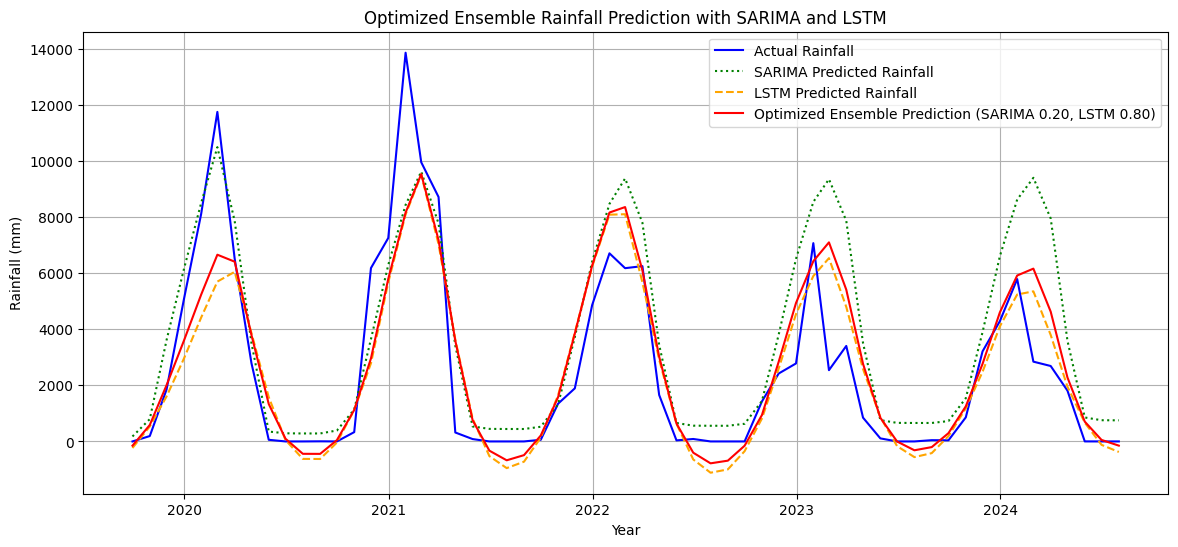

In [7]:
# Step 1: Import necessary libraries
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Define evaluation function
def evaluate_model(predictions, actual, model_name):
    mae = mean_absolute_error(actual, predictions)
    rmse = np.sqrt(mean_squared_error(actual, predictions))
    r2 = r2_score(actual, predictions)
    return mae, rmse, r2

# Step 3: Optimize weights
best_mae, best_rmse, best_r2 = float('inf'), float('inf'), -float('inf')
best_weights = (0.5, 0.5)  # Initial equal weights
best_ensemble_pred = None

# Grid search for weights (SARIMA weight from 0 to 1 in 0.1 increments)
for sarima_weight in np.arange(0, 1.1, 0.1):
    lstm_weight = 1 - sarima_weight  # Ensure weights sum to 1
    ensemble_pred = (sarima_weight * sarima_pred_1d) + (lstm_weight * lstm_pred_1d)
    
    # Evaluate the ensemble model with current weights
    mae, rmse, r2 = evaluate_model(ensemble_pred, actual_rainfall, f"Ensemble SARIMA:{sarima_weight} LSTM:{lstm_weight}")
    
    # Update best weights if this combination is better
    if rmse < best_rmse:  # Prioritize RMSE, but could use MAE or R2 as well
        best_mae, best_rmse, best_r2 = mae, rmse, r2
        best_weights = (sarima_weight, lstm_weight)
        best_hybrid_pred = hybrid_pred

# Step 4: Display the best weights and evaluation metrics
print("Best Hybrid Weights:")
print(f"  SARIMA Weight: {best_weights[0]:.2f}, LSTM Weight: {best_weights[1]:.2f}")
print("Best Hybrid Model Evaluation:")
print(f"  MAE: {best_mae:.3f}")
print(f"  RMSE: {best_rmse:.3f}")
print(f"  R-squared: {best_r2:.3f}")

# Step 5: Plot the optimized ensemble prediction alongside the actual values
plt.figure(figsize=(14, 6))
plt.plot(date_indices, actual_rainfall, label="Actual Rainfall", color="blue")
plt.plot(date_indices, sarima_pred_1d, label="SARIMA Predicted Rainfall", color="green", linestyle=":")
plt.plot(date_indices, lstm_pred_1d, label="LSTM Predicted Rainfall", color="orange", linestyle="--")
plt.plot(date_indices, best_ensemble_pred, label=f"Optimized Hybrid Prediction (SARIMA {best_weights[0]:.2f}, LSTM {best_weights[1]:.2f})", color="red")
plt.title("Optimized Hybrid Rainfall Prediction with SARIMA and LSTM")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
##PREDICTING RAINFALL FOR NEXT FIVE YEARS

C:\Users\26485\AppData\Local\Temp\ipykernel_14740\1105424104.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


Epoch 1/20


C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0652
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0382
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0202
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0213
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0201
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0191
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0273
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0211
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0204
Epoch 10/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0166
Epoch 11/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0219
Epoch 12/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0166
Epoch 13/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0252
Epoch 14/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0184
Epoch 15/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0120


C:\Users\26485\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━

C:\Users\26485\AppData\Local\Temp\ipykernel_14740\1105424104.py:78: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-08-01', periods=future_steps, freq='M')


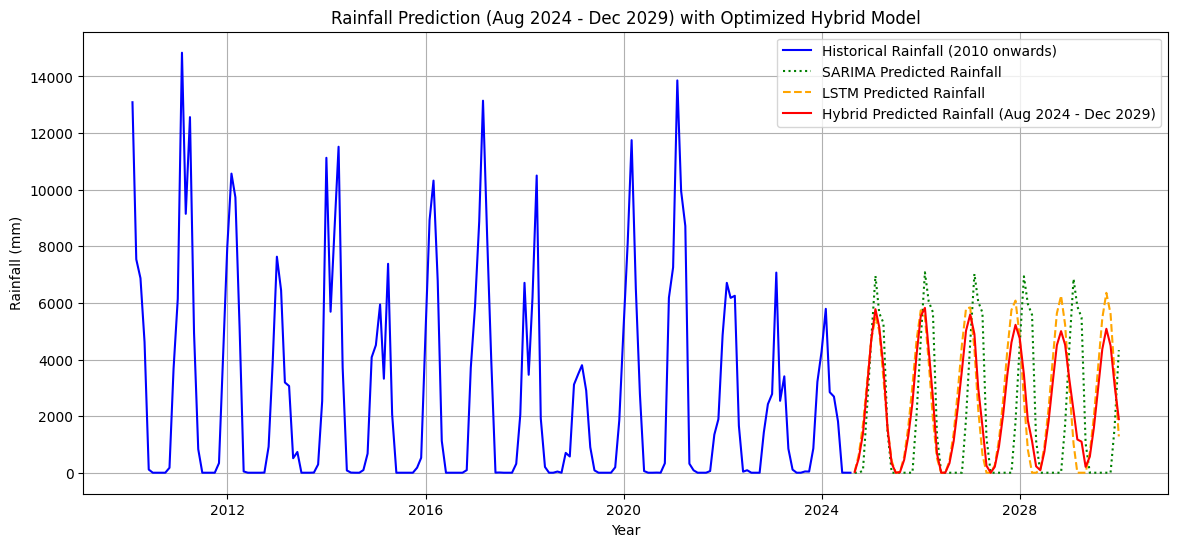

In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and preprocess data
df = pd.read_csv('df1 (1).csv', low_memory=False)
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('datetime', inplace=True)

# Resample to monthly data and calculate monthly totals for rainfall
df_monthly = df.resample('M').sum()

# Filter data from 2010 onwards
df_monthly = df_monthly[df_monthly.index.year >= 2010]

# Scale the precipitation data for LSTM model
scaler_rain = MinMaxScaler(feature_range=(0, 1))
df_monthly['precip_scaled'] = scaler_rain.fit_transform(df_monthly[['precip']])

# Prepare data for LSTM model with look-back window
look_back = 12  # 1 year of monthly data as look-back window
X_rain = []
Y_rain = []

for i in range(look_back, len(df_monthly['precip_scaled'])):
    X_rain.append(df_monthly['precip_scaled'].values[i-look_back:i])
    Y_rain.append(df_monthly['precip_scaled'].values[i])

X_rain, Y_rain = np.array(X_rain), np.array(Y_rain)
X_rain = X_rain.reshape((X_rain.shape[0], X_rain.shape[1], 1))

# Define and train the LSTM model for rainfall prediction
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_rain.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_rain, Y_rain, epochs=20, batch_size=1, verbose=1)

# Define and fit SARIMA model for rainfall prediction
sarima_model = SARIMAX(df_monthly['precip'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

# Make future predictions with SARIMA
future_steps = 65  # Predicting for the next 65 months (Aug 2024 - Dec 2029)
sarima_future_pred = sarima_results.get_forecast(steps=future_steps).predicted_mean

# Ensure SARIMA predictions start at zero if below
sarima_future_pred = np.maximum(sarima_future_pred, 0)

# Make future predictions with LSTM
last_lstm_input = X_rain[-1]  # Start with the last input used in training
lstm_future_preds = []

for _ in range(future_steps):
    next_pred = lstm_model.predict(last_lstm_input.reshape(1, look_back, 1))
    lstm_future_preds.append(next_pred[0, 0])
    last_lstm_input = np.roll(last_lstm_input, -1)
    last_lstm_input[-1] = next_pred

# Inverse scale the LSTM predictions
lstm_future_pred_scaled = scaler_rain.inverse_transform(np.array(lstm_future_preds).reshape(-1, 1)).flatten()
lstm_future_pred_scaled = np.maximum(lstm_future_pred_scaled, 0)  # Ensure no negative values

# Combine predictions using optimized ensemble weights (SARIMA 0.2, LSTM 0.8)
ensemble_future_pred = (0.2 * sarima_future_pred) + (0.8 * lstm_future_pred_scaled)
ensemble_future_pred = np.maximum(ensemble_future_pred, 0)  # Ensure no negative values

# Create a date range for the future predictions
future_dates = pd.date_range(start='2024-08-01', periods=future_steps, freq='M')

# Plot the historical data from 2010 and future predictions with corrected trend
plt.figure(figsize=(14, 6))
plt.plot(df_monthly.index, df_monthly['precip'], color='blue', label='Historical Rainfall (2010 onwards)')
plt.plot(future_dates, sarima_future_pred, color='green', linestyle=':', label='SARIMA Predicted Rainfall')
plt.plot(future_dates, lstm_future_pred_scaled, color='orange', linestyle='--', label='LSTM Predicted Rainfall')
plt.plot(future_dates, ensemble_future_pred, color='red', label='Hybrid Predicted Rainfall (Aug 2024 - Dec 2029)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Prediction (Aug 2024 - Dec 2029) with Optimized Hybrid Model')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\26485\AppData\Local\Temp\ipykernel_23736\1807824340.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()
C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0639
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0357
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0204
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0191
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0210
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0244
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0195
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0146
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0232
Epoch 10/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0194
Epoch 11/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0179
Epoch 12/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0148
Epoch 13/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0265
Epoch 14/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0165
Epoch 15/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - lo

C:\Users\26485\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

C:\Users\26485\AppData\Local\Temp\ipykernel_23736\1807824340.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2024-08-01', periods=future_steps, freq='M')


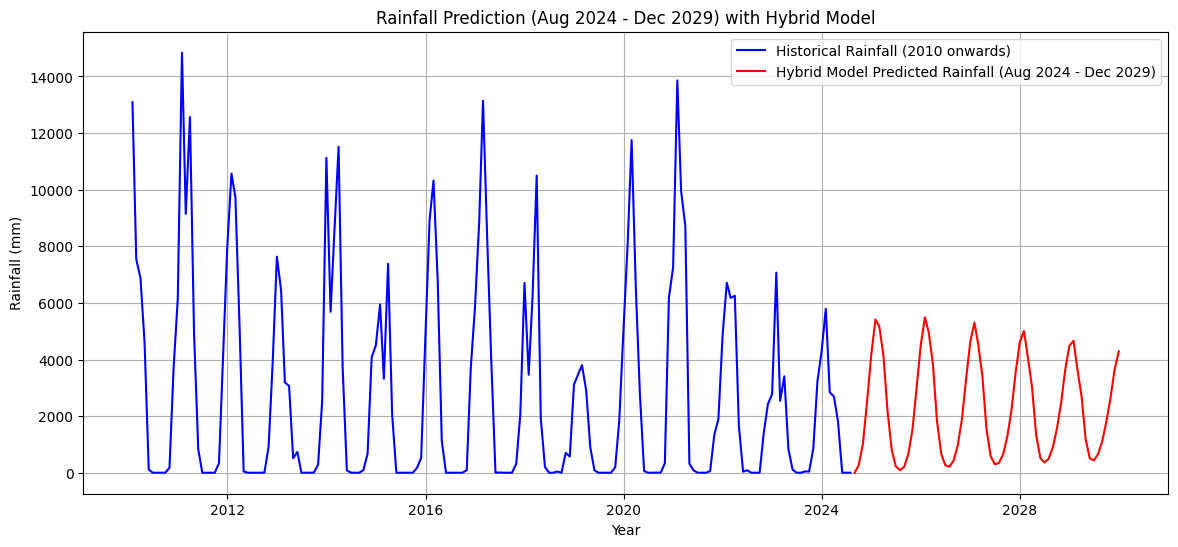

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and preprocess data
df = pd.read_csv('df1 (1).csv', low_memory=False)
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('datetime', inplace=True)

# Resample to monthly data and calculate monthly totals for rainfall
df_monthly = df.resample('M').sum()

# Filter historical data to start from 2010
df_monthly = df_monthly[df_monthly.index >= '2010-01-01']

# Scale the precipitation data for LSTM model
scaler_rain = MinMaxScaler(feature_range=(0, 1))
df_monthly['precip_scaled'] = scaler_rain.fit_transform(df_monthly[['precip']])

# Prepare data for LSTM model with look-back window
look_back = 12  # 1 year of monthly data as look-back window
X_rain = []
Y_rain = []

for i in range(look_back, len(df_monthly['precip_scaled'])):
    X_rain.append(df_monthly['precip_scaled'].values[i-look_back:i])
    Y_rain.append(df_monthly['precip_scaled'].values[i])

X_rain, Y_rain = np.array(X_rain), np.array(Y_rain)
X_rain = X_rain.reshape((X_rain.shape[0], X_rain.shape[1], 1))

# Define and train the LSTM model for rainfall prediction
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_rain.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_rain, Y_rain, epochs=20, batch_size=1, verbose=1)

# Define and fit SARIMA model for rainfall prediction
sarima_model = SARIMAX(df_monthly['precip'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

# Make future predictions with SARIMA
future_steps = 65  # Predicting from Aug 2024 to Dec 2029 (65 months)
sarima_future_pred = sarima_results.get_forecast(steps=future_steps).predicted_mean

# Make future predictions with LSTM
last_lstm_input = X_rain[-1]  # Start with the last input used in training
lstm_future_preds = []

for _ in range(future_steps):
    next_pred = lstm_model.predict(last_lstm_input.reshape(1, look_back, 1))
    lstm_future_preds.append(next_pred[0, 0])
    last_lstm_input = np.roll(last_lstm_input, -1)
    last_lstm_input[-1] = next_pred

lstm_future_pred_scaled = scaler_rain.inverse_transform(np.array(lstm_future_preds).reshape(-1, 1)).flatten()

# Combine predictions using optimized ensemble weights (SARIMA 0.2, LSTM 0.8)
ensemble_future_pred = (0.2 * sarima_future_pred) + (0.8 * lstm_future_pred_scaled)
ensemble_future_pred = np.maximum(ensemble_future_pred, 0)  # Ensure no negative values

# Create a date range for the future predictions
future_dates = pd.date_range(start='2024-08-01', periods=future_steps, freq='M')

# Plot the historical data and only the hybrid model's predictions
plt.figure(figsize=(14, 6))
plt.plot(df_monthly.index, df_monthly['precip'], color='blue', label='Historical Rainfall (2010 onwards)')
plt.plot(future_dates, ensemble_future_pred, color='red', label='Hybrid Model Predicted Rainfall (Aug 2024 - Dec 2029)')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Prediction (Aug 2024 - Dec 2029) with Hybrid Model')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#TEMPERATURE VALIDATION RESULTS

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess data
df = pd.read_csv('df1 (1).csv', low_memory=False)
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('datetime', inplace=True)
df_monthly = df.resample('M').sum()

# Filter data from 2010 onwards
df_monthly = df_monthly[df_monthly.index.year >= 2010]

# Prepare data for ML models
X = np.array(df_monthly.index.month).reshape(-1, 1)  # Use month as input
y = df_monthly['precip'].values  # Target is rainfall

# Split data into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Evaluate Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Gradient Boost
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Prepare data for LSTM
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1))
look_back = 12

X_lstm, y_lstm = [], []
for i in range(look_back, len(y_scaled)):
    X_lstm.append(y_scaled[i-look_back:i, 0])
    y_lstm.append(y_scaled[i, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

X_train_lstm = X_lstm[:train_size-look_back]
y_train_lstm = y_lstm[:train_size-look_back]
X_test_lstm = X_lstm[train_size-look_back:]
y_test_lstm = y_lstm[train_size-look_back:]

# Train and evaluate LSTM
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=1, verbose=1)
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
y_pred_lstm = scaler.inverse_transform(y_pred_lstm.reshape(-1, 1)).flatten()

# Evaluate SARIMAX
sarima_model = SARIMAX(df_monthly['precip'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()
sarima_pred = sarima_results.get_prediction(start=df_monthly.index[train_size], end=df_monthly.index[-1])
y_pred_sarima = sarima_pred.predicted_mean.values

# Hybrid Model (SARIMAX + LSTM)
y_pred_hybrid = 0.2 * y_pred_sarima + 0.8 * y_pred_lstm[:len(y_pred_sarima)]

# Calculate evaluation metrics
models = ['Linear Regression', 'Random Forest', 'Gradient Boost', 'LSTM', 'SARIMAX', 'Hybrid (SARIMAX + LSTM)']
predictions = [y_pred_linear, y_pred_rf, y_pred_gb, y_pred_lstm[:len(y_test)], y_pred_sarima, y_pred_hybrid]
mae, rmse, r2 = [], [], []

for y_pred in predictions:
    mae.append(mean_absolute_error(y_test[:len(y_pred)], y_pred))
    rmse.append(np.sqrt(mean_squared_error(y_test[:len(y_pred)], y_pred)))
    r2.append(r2_score(y_test[:len(y_pred)], y_pred))

# Display results
results = pd.DataFrame({
    'Model': models,
    'MAE': mae,
    'RMSE': rmse,
    'R-squared': r2
})

# Print the results
print("Model Evaluation Metrics for Rainfall Prediction:")
print(results)


C:\Users\26485\AppData\Local\Temp\ipykernel_23736\2876650613.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


Epoch 1/20


C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0801
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0492
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0322
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0260
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0305
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0260
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0304
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172
Epoch 9/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0237
Epoch 10/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0262
Epoch 11/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0240
Epoch 12/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0261
Epoch 13/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0211
Epoch 14/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0204
Epoch 15/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0222


C:\Users\26485\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#ALL ML MODELS RAINFALL CROSS VALIDATION RESULTS

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load and preprocess data
df = pd.read_csv('df1 (1).csv', low_memory=False)
df['datetime'] = pd.to_datetime(df[['year', 'month']].assign(day=1))
df.set_index('datetime', inplace=True)
df_monthly = df.resample('M').sum()

# Filter data from 2010 onwards
df_monthly = df_monthly[df_monthly.index.year >= 2010]

# Prepare data for ML models
X = np.array(df_monthly.index.month).reshape(-1, 1)  # Use month as input
y = df_monthly['precip'].values  # Target is rainfall

# Split data into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Evaluate Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Evaluate Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Gradient Boost
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Prepare data for LSTM
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.reshape(-1, 1))
look_back = 12

X_lstm, y_lstm = [], []
for i in range(look_back, len(y_scaled)):
    X_lstm.append(y_scaled[i-look_back:i, 0])
    y_lstm.append(y_scaled[i, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = X_lstm.reshape((X_lstm.shape[0], X_lstm.shape[1], 1))

X_train_lstm = X_lstm[:train_size-look_back]
y_train_lstm = y_lstm[:train_size-look_back]
X_test_lstm = X_lstm[train_size-look_back:]
y_test_lstm = y_lstm[train_size-look_back:]

# Define LSTM Model
def create_lstm_model():
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(look_back, 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# LSTM Model Training
lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=1, verbose=1)
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
y_pred_lstm = scaler.inverse_transform(y_pred_lstm.reshape(-1, 1)).flatten()

# Evaluate SARIMAX
sarima_model = SARIMAX(df_monthly['precip'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()
sarima_pred = sarima_results.get_prediction(start=df_monthly.index[train_size], end=df_monthly.index[-1])
y_pred_sarima = sarima_pred.predicted_mean.values

# Hybrid Model (SARIMAX + LSTM)
y_pred_hybrid = 0.2 * y_pred_sarima + 0.8 * y_pred_lstm[:len(y_pred_sarima)]

# Calculate evaluation metrics for holdout set
models = ['Linear Regression', 'Random Forest', 'Gradient Boost', 'LSTM', 'SARIMAX', 'Hybrid (SARIMAX + LSTM)']
predictions = [y_pred_linear, y_pred_rf, y_pred_gb, y_pred_lstm[:len(y_test)], y_pred_sarima, y_pred_hybrid]
mae, rmse, r2 = [], [], []

for y_pred in predictions:
    mae.append(mean_absolute_error(y_test[:len(y_pred)], y_pred))
    rmse.append(np.sqrt(mean_squared_error(y_test[:len(y_pred)], y_pred)))
    r2.append(r2_score(y_test[:len(y_pred)], y_pred))

# Display holdout results
holdout_results = pd.DataFrame({
    'Model': models,
    'MAE': mae,
    'RMSE': rmse,
    'R-squared': r2
})
print("Holdout Evaluation Metrics for Rainfall Prediction:")
print(holdout_results)

# K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = []
cv_models = [linear_model, rf_model, gb_model]

# K-Fold for ML Models
for model in cv_models:
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kfold)
    cv_results.append(np.sqrt(-scores).mean())

# Add LSTM Cross Validation
lstm_cv_rmse = []
for train, test in kfold.split(X_lstm):
    X_train_fold, X_test_fold = X_lstm[train], X_lstm[test]
    y_train_fold, y_test_fold = y_scaled[train + look_back], y_scaled[test + look_back]
    lstm_model = create_lstm_model()
    lstm_model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=1, verbose=0)
    y_pred_fold = lstm_model.predict(X_test_fold).flatten()
    lstm_cv_rmse.append(np.sqrt(mean_squared_error(y_test_fold, y_pred_fold)))
cv_results.append(np.mean(lstm_cv_rmse))

# Add SARIMAX (pseudo cross-validation)
sarima_cv = np.mean(np.sqrt(-sarima_results.resid**2))  # Approximation using residuals
cv_results.append(sarima_cv)

# Display K-Fold results
cv_results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boost', 'LSTM', 'SARIMAX'],
    'CV RMSE': cv_results
})
print("K-Fold Cross-Validation Results:")
print(cv_results_df)


C:\Users\26485\AppData\Local\Temp\ipykernel_37692\4101178287.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()
C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0742
Epoch 2/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0432
Epoch 3/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0368
Epoch 4/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0265
Epoch 5/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0290
Epoch 6/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0207
Epoch 7/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0254
Epoch 8/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0187
Epoch 9/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0159
Epoch 10/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0230
Epoch 11/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0240
Epoch 12/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0229
Epoch 13/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0277
Epoch 14/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0163
Epoch 15/20
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - lo

C:\Users\26485\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Holdout Evaluation Metrics for Rainfall Prediction:
                     Model          MAE         RMSE  R-squared
0        Linear Regression  2196.255523  2463.365975  -0.214140
1            Random Forest  1242.534555  2003.161623   0.197135
2           Gradient Boost  1247.941860  2019.182327   0.184241
3                     LSTM   952.354354  1291.043828   0.666502
4                  SARIMAX   866.911384  1260.603791   0.682043
5  Hybrid (SARIMAX + LSTM)   867.073582  1228.340681   0.698110


C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 475ms/step


C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001EBCC83C820> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step


C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


C:\Users\26485\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
K-Fold Cross-Validation Results:
               Model      CV RMSE
0  Linear Regression  3381.636761
1      Random Forest  2112.593506
2     Gradient Boost  2109.347730
3               LSTM     0.150974
4            SARIMAX          NaN


C:\Users\26485\anaconda3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
